In this script, we calclate global distribution of dust DRE by using the DREE-integration method introduced in Song et al. 2022 section 4 Eq.(6).

(1), DREE_k can be directly obtained from the Song et al. (2022) size-resolved DREE dataset for 6 dust models (reference Table 1 in Song et al. (2022) for list of refractive index. 

References:

Song, Q., Zhang, Z., Yu, H., Ginoux, P., and Shen, J.: Global dust optical depth climatology derived from CALIOP and MODIS aerosol retrievals on decadal timescales: regional and interannual variability, Atmos. Chem. Phys., 21, 13369–13395, https://doi.org/10.5194/acp-21-13369-2021, 2021.

Kok, J.F., Adebiyi, A.A., Albani, S., Balkanski, Y., Checa-Garcia, R., Chin, M., Colarco, P.R.,Hamilton, D.S., Huang, Y., Ito, A., Klose, M., Li, L., Mahowald, N.M., Miller, R.L., Obiso, V., Pérez García-Pando, C., Rocha-Lima, A., Wan, J.S., 2021b. Contribution of the world’s main dust source regions to the global cycle of desert dust. Atmos. Chem. Phys.,21, 8169-93. https://doi.org/10.5194/acp-21-8127-2021 



In [51]:
# ----------
# Colab does not have basemap package
# This cell is to manually install basemap package to google colab
# Note, we need to 'Restart Runtime' after we install the package.
#----------

!pip install basemap

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset
from scipy import stats
from mpl_toolkits.basemap import Basemap  #need to install manually by using '!pip install basemap'
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator

# 1. Download DREE Data Array

 - MeanRI, MinRI, and MaxRI + Sphere and Spheroid

In [142]:
#----------
# Read Size-resolved DREE dataset developed in this study.
# Song et al. (2022) developed size-resolved DREE for six dust models (see Table 1 in the paper Song et al. 2022) in SW and LW respectively.
# The size-resolved dust DREE dataset and the codes to calculate dust DRE for any given dust PSD and DAOD are available at https://drive.google.com/drive/folders/15_e28Y9JiSWiJnIM_2flEmt2u6i9phEY?usp=sharing
#----------

data_dir = '../Data/'

dree_shape = ['Sphere', 'Spheroid']
dree_range = ['Min RI', 'Mean RI', 'Max RI']
dree_radition = ['SW', 'LW']

# choose minRI, meanRI, or maxRI
#dree = 0 #min
dree = 1 # mean
#dree = 2 # max

# choose dust shape
dree_shp = 0 #sphere
#dree_shp = 1 #spheroid

# choose radiation range
#dree_rad = 0 #SW
dree_rad = 1 #LW

#SW = 0 
#sphere dust shape = 0
if dree == 0 and dree_shp == 0 and dree_rad ==0:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MinSWRI-Sphere-20072010.nc') #minRI
if dree == 1 and dree_shp == 0 and dree_rad ==0:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MeanSWRI-Sphere-20072010.nc') #meanRI
if dree == 2 and dree_shp == 0 and dree_rad ==0:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MaxSWRI-Sphere-20072010.nc') #maxRI

#spheroid dust shape = 1
if dree == 0 and dree_shp == 1 and dree_rad ==0:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MinSWRI-DubovikSpheroid-20072010.nc') #minRI
if dree == 1 and dree_shp == 1 and dree_rad ==0:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MeanSWRI-DubovikSpheroid-20072010.nc') #meanRI
if dree == 2 and dree_shp == 1 and dree_rad ==0:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MaxSWRI-DubovikSpheroid-20072010.nc') #maxRI
    

#LW = 1
#sphere dust shape = 0
if dree == 0 and dree_shp == 0 and dree_rad ==1:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MinLWRI-Sphere-20072010.nc') #minRI
if dree == 1 and dree_shp == 0 and dree_rad ==1:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MeanLWRI-Sphere-20072010.nc') #meanRI
if dree == 2 and dree_shp == 0 and dree_rad ==1:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MaxLWRI-Sphere-20072010.nc') #maxRI

#spheroid dust shape = 1
if dree == 0 and dree_shp == 1 and dree_rad ==1:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MinLWRI-DubovikSpheroid-20072010.nc') #minRI
if dree == 1 and dree_shp == 1 and dree_rad ==1:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MeanLWRI-DubovikSpheroid-20072010.nc') #meanRI
if dree == 2 and dree_shp == 1 and dree_rad ==1:
    dree_sw = Dataset(data_dir+'GlobalClearSky-MonthlyMean-SizeResolved-DustDREE-MaxLWRI-DubovikSpheroid-20072010.nc') #maxRI

    
dreesw_toa = np.array(dree_sw.variables['DREE_TOA'][:])
#DREE_TOA(sizebin_center, month, lat, lon)
dreesw_bin_edge = np.array(dree_sw.variables['sizebin_edge'])
dreesw_bin_center = np.array(dree_sw.variables['sizebin_center'])
dreesw_suf = np.array(dree_sw.variables['DREE_SUF'][:])

lat = dree_sw.variables['lat']
#print(lat)
lon = dree_sw.variables['lon']
#print(lon)

Song et al. (2022) DREE lat and lon

In [143]:
print(lat[:]) #Song et al. DREE range of lat and lon
print(lon[:])
print(len(lat[:]))
print(len(lon[:]))

[-89. -87. -85. -83. -81. -79. -77. -75. -73. -71. -69. -67. -65. -63.
 -61. -59. -57. -55. -53. -51. -49. -47. -45. -43. -41. -39. -37. -35.
 -33. -31. -29. -27. -25. -23. -21. -19. -17. -15. -13. -11.  -9.  -7.
  -5.  -3.  -1.   1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.
  23.  25.  27.  29.  31.  33.  35.  37.  39.  41.  43.  45.  47.  49.
  51.  53.  55.  57.  59.  61.  63.  65.  67.  69.  71.  73.  75.  77.
  79.  81.  83.  85.  87.  89.]
[-177.5 -172.5 -167.5 -162.5 -157.5 -152.5 -147.5 -142.5 -137.5 -132.5
 -127.5 -122.5 -117.5 -112.5 -107.5 -102.5  -97.5  -92.5  -87.5  -82.5
  -77.5  -72.5  -67.5  -62.5  -57.5  -52.5  -47.5  -42.5  -37.5  -32.5
  -27.5  -22.5  -17.5  -12.5   -7.5   -2.5    2.5    7.5   12.5   17.5
   22.5   27.5   32.5   37.5   42.5   47.5   52.5   57.5   62.5   67.5
   72.5   77.5   82.5   87.5   92.5   97.5  102.5  107.5  112.5  117.5
  122.5  127.5  132.5  137.5  142.5  147.5  152.5  157.5  162.5  167.5
  172.5  177.5]
90
72


In [144]:
print(dreesw_bin_center)

[ 0.14976312  0.2988167   0.5962177   1.1896107   2.3735855   4.7359257
  9.449414   18.85406    37.618793   75.059364  ]


# 2. Download DustCOMM Data

Read in DustCOMM dataset (Kok e al. 2021b) for Mean DAOD, lat, lon, and sources data

In [145]:

#----------
# using DustCOMM 2021 papers b) https://dustcomm.atmos.ucla.edu/
# specifically https://dustcomm.atmos.ucla.edu/data/K21b/ dataset DustCOMM_source_region_DAOD_seas_bin_abs.nc
# assumes aspherical dust shape, PM20 dust
#----------

data_dir = '../Data/'
daod_Dustcomm_PM20_Dataset = Dataset(data_dir + 'DustCOMM_source_region_DAOD_seas_bin_abs.nc')
print(daod_Dustcomm_PM20_Dataset) #[season,source,diameter,lat,lon,bin]

lat_Dustcomm_PM20 = np.array(daod_Dustcomm_PM20_Dataset.variables['lat'][:])
lon_Dustcomm_PM20 = np.array(daod_Dustcomm_PM20_Dataset.variables['lon'][:])
mean_Daod_Dustcomm_20PM = np.array(daod_Dustcomm_PM20_Dataset.variables['Mean'][:])
dustcomm_seas = np.array(daod_Dustcomm_PM20_Dataset.variables['season'][:])
dustcomm_Sources_PM20 = np.array(daod_Dustcomm_PM20_Dataset.variables['source'][:]) 
dustcomm_bin_lower = np.array(daod_Dustcomm_PM20_Dataset.variables['bin_D_lower'][:])
dustcomm_bin_upper = np.array(daod_Dustcomm_PM20_Dataset.variables['bin_D_upper'][:])
print(dustcomm_bin_lower)
print(dustcomm_bin_upper)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): season(4), source(9), diameter(6), lat(96), lon(144), bin(6)
    variables(dimensions): float64 season(season), float64 source(source), float64 bin_D_lower(diameter), float64 bin_D_upper(diameter), float64 lat(lat), float64 lon(lon), float64 Median(lat, lon, bin, source, season), float64 Mean(lat, lon, bin, source, season), float64 Neg1sigma(lat, lon, bin, source, season), float64 Pos1sigman(lat, lon, bin, source, season), float64 Neg2sigma(lat, lon, bin, source, season), float64 Pos2sigma(lat, lon, bin, source, season)
    groups: 
[ 0.2  0.5  1.   2.5  5.  10. ]
[ 0.5  1.   2.5  5.  10.  20. ]


In [146]:
print(dustcomm_seas) 
#1:DJF, 2:MAM, 3:JJA, 4:SON

[1. 2. 3. 4.]


In [147]:
bins = daod_Dustcomm_PM20_Dataset.dimensions['bin']
print(bins)

<class 'netCDF4._netCDF4.Dimension'>: name = 'bin', size = 6


In [148]:
print(mean_Daod_Dustcomm_20PM.shape) #(96 lat, 144 lon, 6 bins, 9 sources,4 seasons)
#print(mean_Daod_Dustcomm_20PM)

(96, 144, 6, 9, 4)


In [149]:
print(dreesw_toa.shape)
dreesw_toa[:3].shape

(10, 12, 90, 72)


(3, 12, 90, 72)

# 3. Resize DREE bins (10) to DAOD bins (6)

 - Weighted summ of DREE first three bins

In [150]:
#Apply bin weights used in Song et al. (2022) from Kok et al. 2017 PSD

# Read the '.txt' file that is uploaded above. 
faodd = np.loadtxt('../Data/Faod_kok17PSD_2Shape_3RI.txt',skiprows=1)
faod_minri_sphere = faodd[:,2]
faod_meanri_sphere = faodd[:,1]
faod_maxri_sphere = faodd[:,0]

#faod_minri_spheroid = faodd[:,5]
#faod_meanri_spheroid = faodd[:,4]
#faod_maxri_spheroid = faodd[:,3]

if dree == 0: #minRI
    faod = faodd[:,2]
if dree == 1: #meanRI
    faod = faodd[:,1]
if dree == 2: #maxRI
    faod = faodd[:,0]

faod_sphere_6bins = np.zeros(6)
for i in range(8):
    if i <= 2:
        faod_sphere_6bins[0] = np.sum(faod[:3]) #combine first 3 bins as new first bin
    else:
        faod_sphere_6bins[i-2] = faod[i]
print(faod_sphere_6bins)
print(np.sum(faod_sphere_6bins))

[0.11079548 0.2098     0.3314     0.2427     0.0943     0.0109    ]
0.9998954800000001


In [151]:
#mean_Daod_Dustcomm_20PM
dree_Weights = faod_sphere_6bins
print(dreesw_toa.shape)
dreesw_toa_6bins = np.zeros((6,12,90,72))
for ibin in range(8): #removing last two bin centers bc they are greater than PM20
    for imn in range(12):
        for ilat in range(len(lat)):
            for ilon in range(len(lon)):
                if ibin <= 2:
                    dreesw_toa_6bins[0,imn,ilat,ilon] = np.dot(dreesw_toa[:3,imn,ilat,ilon],dree_Weights[:3]) #:3 or :2?
                else: #4?
                    dreesw_toa_6bins[ibin-2,imn,ilat,ilon] = dreesw_toa[ibin,imn,ilat,ilon] #*weights[ibin] #-3?
print(dreesw_toa_6bins.shape)

(10, 12, 90, 72)
(6, 12, 90, 72)


 ## 4. Chose North African Sources

In [152]:
north_African_Mean_Daod_20PM = mean_Daod_Dustcomm_20PM[:,:,:,:3,:]
#North Africa = sources #1,2,3 so first 3 (Eastern NorAf, Western North Africa, and South Sahara + Sahel)
print(north_African_Mean_Daod_20PM.shape) #(96lat, 144lon, 6bins, 3sources, 4seasons)
#print(north_African_Mean_Daod_20PM)

(96, 144, 6, 3, 4)


In [153]:
##Look at DustCOMM Data - seasonal resolved,6bins, PM20 
#print(lat_Dustcomm_PM20) 
#print(lon_Dustcomm_PM20)
print(len(lat_Dustcomm_PM20))
print(len(lon_Dustcomm_PM20))

96
144


# 5. Find Nearest Neighbor of DustCOMM and Song et al. DREE datasets to get same array size and correct corresponding DAOD meausurements for the correct (lat,lon)

Latitude NN (Nearest Neighbor)

In [154]:
#----------
# Choosing nearest neighbor between DustCOMM DAOD coordinates &Song et al. DREE coordinate range
# Song et al. : 90 lattitude values, 72 longitude values
# DustCOMM : 96 lattitude values, 144 longitude values
# --> Song et al. uses every other longitude value that DustCOMM uses
# Latitude is not as simple
#----------

lat_list_dust = list(lat_Dustcomm_PM20)
print(len(lat_list_dust))
nn_lat_song = []
index_dustcomm_lat = []
nn_lat_dustcomm = []

double_index_dustcomm_lat = []
for i in lat_Dustcomm_PM20:
    for j in lat[:]: #Song et al. 2022 DREE
        if np.round(i)+1 == np.round(j) or np.round(i)== np.round(j):
            nn_lat_song.append(j)
            index_dustcomm_lat.append(lat_list_dust.index(i))
            nn_lat_dustcomm.append(i)
print(len(nn_lat_dustcomm))
print(len(index_dustcomm_lat)) #95 instead of 96 indexes


# double -81.0 lat, -45.0 lat, -9.0 lat, +27 lat, +63
#1/9 Jasper said to take the average of latitudes , take the second one 
#[-82.41999816894531, -81.0], [-80.52999877929688, -81.0],
#print(nn_lat_dustcomm.index(-82.41999816894531), nn_lat_dustcomm.index(-80.52999877929688))
#[-46.41999816894531, -45.0], [-44.529998779296875, -45.0],
#print(lat_list_dust.index(-46.41999816894531), lat_list_dust.index(-44.529998779296875))
#print(nn_lat_dustcomm.index(-46.41999816894531), nn_lat_dustcomm.index(-44.529998779296875))
#[-10.420000076293945, -9.0], [-8.526000022888184, -9.0],
#print(nn_lat_dustcomm.index(-10.420000076293945), nn_lat_dustcomm.index(-8.526000022888184))
#[25.579999923706055, 27.0], [27.469999313354492, 27.0],
#print(nn_lat_dustcomm.index(25.579999923706055), nn_lat_dustcomm.index(27.469999313354492))
#[61.58000183105469, 63.0], [63.470001220703125, 63.0],
#print(nn_lat_dustcomm.index(61.58000183105469), nn_lat_dustcomm.index(63.470001220703125))

del nn_lat_dustcomm[80]
del nn_lat_dustcomm[61]
del nn_lat_dustcomm[42]
del nn_lat_dustcomm[23]
del nn_lat_dustcomm[4]
print(len(nn_lat_dustcomm)) 
#print(nn_lat_dustcomm)

#print(index_dustcomm_lat.index(80))
#print(index_dustcomm_lat.index(61))
#print(index_dustcomm_lat.index(42))
#print(index_dustcomm_lat.index(23))
#print(index_dustcomm_lat.index(4))

del index_dustcomm_lat[80]
del index_dustcomm_lat[61]
del index_dustcomm_lat[42]
del index_dustcomm_lat[23]
del index_dustcomm_lat[4]

#print(len(index_dustcomm_lat)) #90
nn_lat = np.sort(list(set(nn_lat_song)))
print(len(nn_lat_song),nn_lat_song)

96
95
95
90
95 [-89.0, -87.0, -85.0, -83.0, -81.0, -81.0, -79.0, -77.0, -75.0, -73.0, -71.0, -69.0, -67.0, -65.0, -63.0, -61.0, -59.0, -57.0, -55.0, -53.0, -51.0, -49.0, -47.0, -45.0, -45.0, -43.0, -41.0, -39.0, -37.0, -35.0, -33.0, -31.0, -29.0, -27.0, -25.0, -23.0, -21.0, -19.0, -17.0, -15.0, -13.0, -11.0, -9.0, -9.0, -7.0, -5.0, -3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 21.0, 23.0, 25.0, 27.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0, 39.0, 41.0, 43.0, 45.0, 47.0, 49.0, 51.0, 53.0, 55.0, 57.0, 59.0, 61.0, 63.0, 63.0, 65.0, 67.0, 69.0, 71.0, 73.0, 75.0, 77.0, 79.0, 81.0, 83.0, 85.0, 87.0, 89.0]


Nearest Neighbor Longitudes

In [155]:
#72 is correct, every other dustcomm lon is chosen
nn_lon = []
index_dustcomm_lon = []
lon_list_dust = list(lon_Dustcomm_PM20)
for i in lon_Dustcomm_PM20 : #dustComm 
    for j in lon[:]: #Song et al
        if np.round(i)== np.round(j):
            nn_lon.append(j)
            index_dustcomm_lon.append(lon_list_dust.index(i))
            
print(len(nn_lon),nn_lon)

72 [-177.5, -172.5, -167.5, -162.5, -157.5, -152.5, -147.5, -142.5, -137.5, -132.5, -127.5, -122.5, -117.5, -112.5, -107.5, -102.5, -97.5, -92.5, -87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5, -42.5, -37.5, -32.5, -27.5, -22.5, -17.5, -12.5, -7.5, -2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5, 132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5, 177.5]


Printing to make sure index arrays are the correct size

In [156]:
print(len(index_dustcomm_lat))
print(index_dustcomm_lat)
print(len(index_dustcomm_lon))
print(index_dustcomm_lon)

90
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
72
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142]


# 6. Now match DAOD dataset to match nearest neighbor lattitude and longitude 

In [157]:
#summed DoAD 20PM across 3 sahara sources for 1 north african value
#north_African_Mean_Daod_20PM.shape #(96lat, 144lon, 6bins, 3sources, 4seasons)

print(north_African_Mean_Daod_20PM.shape)#(96, 144, 3) (lat,lon,sources)
#print(len(north_African_Mean_Daod_20PM[:,:,1])) #96 DAoD
sum_North_African_Mean_Daod_20PM = (north_African_Mean_Daod_20PM[:,:,:,0,:] +north_African_Mean_Daod_20PM[:,:,:,1,:] +north_African_Mean_Daod_20PM[:,:,:,2,:]) #/3
print(len(sum_North_African_Mean_Daod_20PM))
print(len(sum_North_African_Mean_Daod_20PM[0]))
print(sum_North_African_Mean_Daod_20PM.shape)
#96 rows of arrays 144 inputs long (one for each latitude)
sum_North_African_lat_lon_DAOD = []

nn_Daod_NAf = []
for i in index_dustcomm_lat:
        nn_Daod_NAf.append(sum_North_African_Mean_Daod_20PM[i][::2]) #72 instead of 144 lon
nn_Daod_NAf = np.array(nn_Daod_NAf)
print(nn_Daod_NAf.shape) # 90 arrays, each array 72 inputs 
   

(96, 144, 6, 3, 4)
96
144
(96, 144, 6, 4)
(90, 72, 6, 4)


# 7. Calculate SW DRE with DREE, DAOD, and faod

In [158]:

#----------
# Calculate dust DRE with DREE-integration method introduced in Song et al. 2022 Eq.(6)
# Dust DRE Dimension: (12 month, 90 latitude, 72 longitude). Unit: (W/m^2)
#----------

nn_dresw_toa_bin_weighted = np.zeros((6,12,90,72)) # DREE_SW at TOA for MeanRI-Sphere dust model 
bin_sum_nn_dresw_toa_bin_weighted = np.zeros((12,90,72)) # DREE_LW at TOA for MeanRI-Sphere dust model

#print(dustcomm_seas) 
#1:DJF, 2:MAM, 3:JJA, 4:SON

#DRE[bin,month,lat,lon] = DREE[bin,month,lat,lon] * DAOD[lat,lon] *F_AOD[bin]

for imn in range(12): #imn for each month
        for ilat in range(90):
            for ilon in range(72):
                if imn == 0 or 1 or 11:
                    nn_dresw_toa_bin_weighted[:,imn,ilat,ilon] = dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,0]
                    bin_sum_nn_dresw_toa_bin_weighted[imn,ilat,ilon] = np.sum(dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,0])
                if imn == 2 or 3 or 4:
                    nn_dresw_toa_bin_weighted[:,imn,ilat,ilon] = dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,1]
                    bin_sum_nn_dresw_toa_bin_weighted[imn,ilat,ilon] = np.sum(dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,1])
                if imn == 5 or 6 or 7:
                    nn_dresw_toa_bin_weighted[:,imn,ilat,ilon] = dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,2]
                    bin_sum_nn_dresw_toa_bin_weighted[imn,ilat,ilon] = np.sum(dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,2])
                if imn == 8 or 9 or 10:
                    nn_dresw_toa_bin_weighted[:,imn,ilat,ilon] = dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,3]
                    bin_sum_nn_dresw_toa_bin_weighted[imn,ilat,ilon] = np.sum(dreesw_toa_6bins[:,imn,ilat,ilon]*nn_Daod_NAf[ilat,ilon,:,3])
        

DRE sw_meanri_sphere_toa[imn,ilat,ilon]

In [159]:
print(np.shape(nn_dresw_toa_bin_weighted))
print(np.shape(bin_sum_nn_dresw_toa_bin_weighted))

(6, 12, 90, 72)
(12, 90, 72)


# 8. DRE Plots by bin for month of July

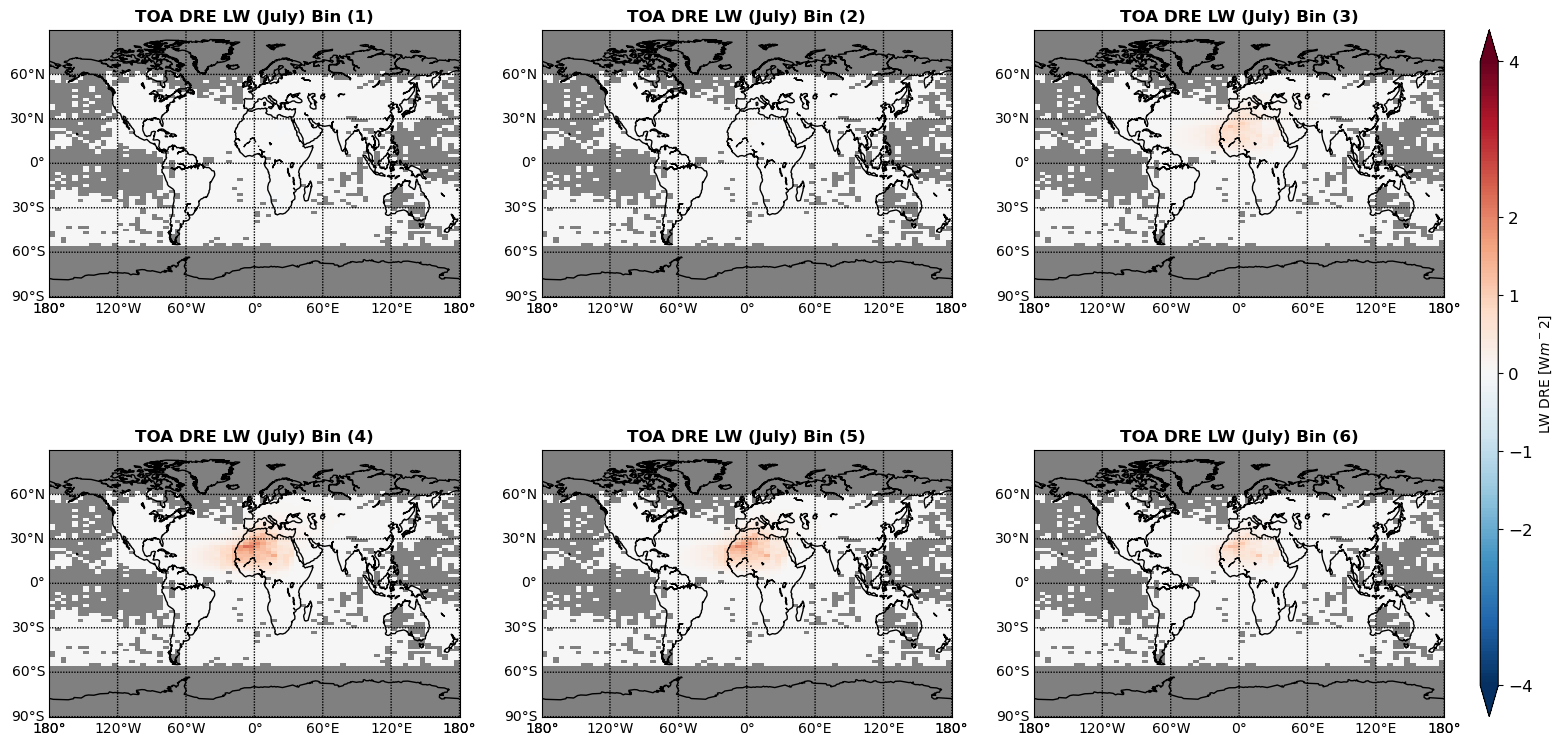

In [160]:

#define lon lat boundaries for map plot
lon_bds = np.arange(-180,181,5)  # longitude grid boundaries (CALIOP DATA)
lat_bds = np.arange(-90,91,2)   # latitude grid boundaries (CALIOP DATA)

bounds_swdre = np.arange(-4,4.04,0.04)
norm_swdre  = colors.BoundaryNorm(boundaries = bounds_swdre, ncolors = 256)

##Sahara Only: 10W, 30E lattiutude and 15N-30N and longitude
#----------
#Global Map of Monthly Mean DRE_SW of North African Dust
#----------

fig,ax = plt.subplots(2,3,figsize=(18,10))
fig.patch.set_facecolor('white')
map = Basemap(llcrnrlon = -180, llcrnrlat = -90, urcrnrlon = 180, urcrnrlat = 90)
#map = Basemap(llcrnrlon = -30, llcrnrlat = 0, urcrnrlon = 50, urcrnrlat = 40) #for North Africa zoom

Lon,Lat = map(lon_bds,lat_bds)   
aspect=1.3
mns=np.array(['January','Feburary','March','April','May','June','July','Aug','September','October','November','December'])

#Plot July DRE by bin
imn=6 # July
binn = np.arange(0,6,1)

fig_arrangement = [ax[0,0] ,ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2]]

for i in binn:
    axis= fig_arrangement[i]
    map.drawcoastlines(ax=axis)
    map.drawparallels(np.arange(-90.,90.,30.),labels=[True,False,False,False],ax=axis,fontsize=10)
    map.drawmeridians(np.arange(-180.,180.,60.),labels=[False,False,False,True],ax=axis,fontsize=10)
    cs00=map.pcolormesh(Lon,Lat,nn_dresw_toa_bin_weighted[binn[i],imn,:,:],cmap=plt.get_cmap('RdBu_r'),norm=norm_swdre,ax=axis)
    axis.set_title('TOA DRE {:} ({:s}) Bin ({:})'.format(dree_radition[dree_rad], mns[imn],binn[i]+1),fontsize=12,fontweight='bold')
    axis.set_aspect(aspect)

cmap = plt.cm.get_cmap("RdBu_r").copy()
cmap.set_bad(color='grey')

#****Colorbar
# getting the lower left (x0,y0) and upper right (x1,y1) corners:
[[x00,y00],[x01,y01]] = ax[0,2].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[1,2].get_position().get_points()
pad = 0.02; width = 0.01
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
axcb = fig.colorbar(cs00, cax=cbar_ax,extend='both',ticks=np.array([-4,-2,-1,0,1,2,4]))
axcb.ax.tick_params(labelsize=12)
axcb.set_label('{:} DRE [W$m^-2$]'.format(dree_radition[dree_rad]))


# 9. SW DRE calculated by month, bin averaged

/var/folders/47/97wl1v310zqcw6zy080_r_8r0000gs/T/ipykernel_18166/105185358.py:37: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu_r").copy()
  cmap.set_bad(color='grey')


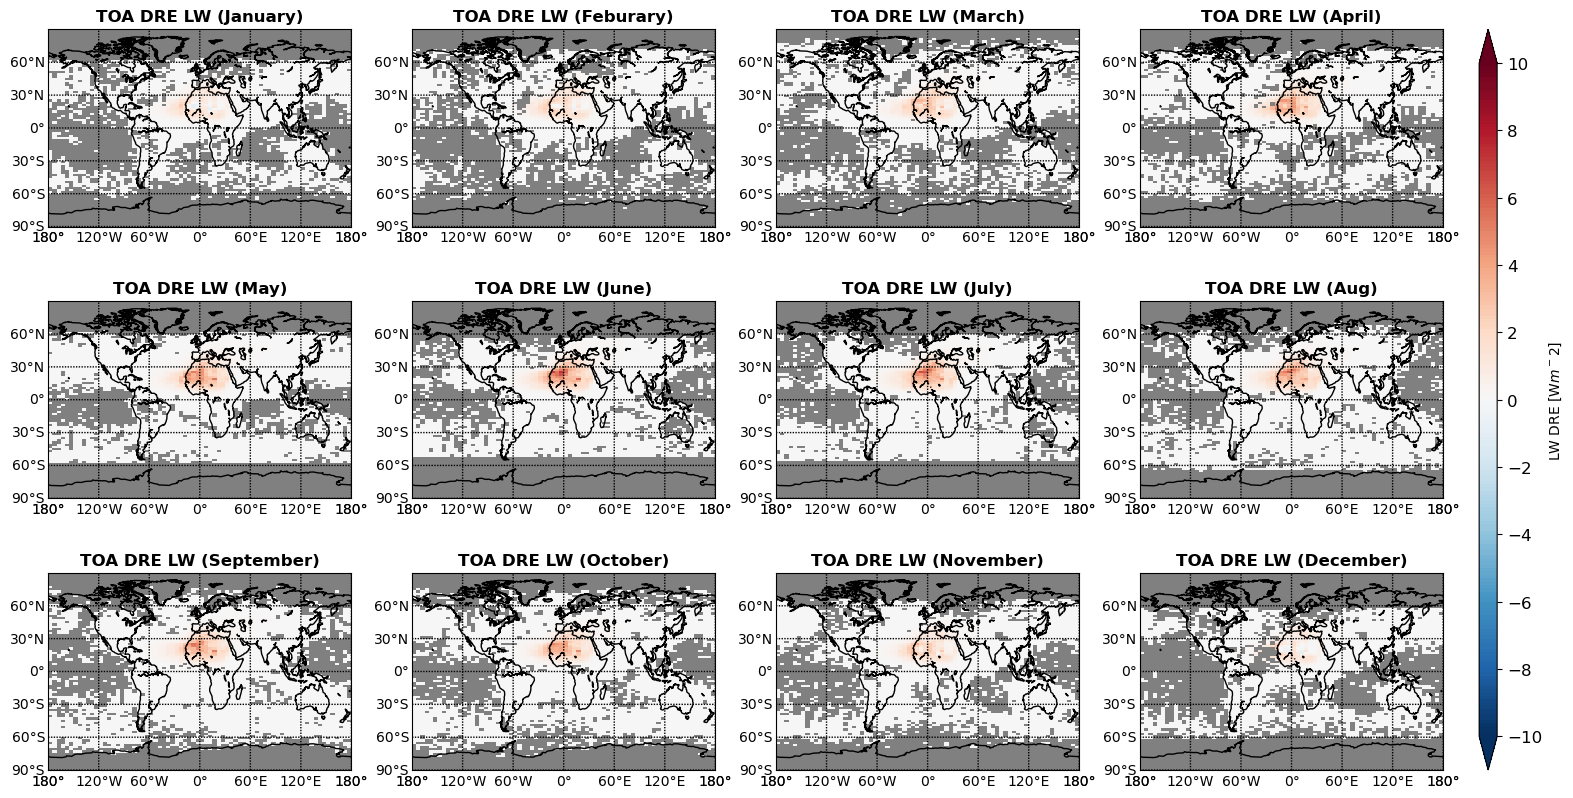

In [161]:
#define lon lat boundaries for map plot
lon_bds = np.arange(-180,181,5)  # longitude grid boundaries (CALIOP DATA)
lat_bds = np.arange(-90,91,2)   # latitude grid boundaries (CALIOP DATA)


bounds_swdre = np.arange(-10,10.1,0.1)
norm_swdre  = colors.BoundaryNorm(boundaries = bounds_swdre, ncolors = 256)
##Sahara Only: 10W, 30E lattiutude and 15N-30N and longitude
#----------
#Global Map of Monthly Mean DRE_SW of North African Dust
#----------

fig,ax = plt.subplots(3,4,figsize=(18,10))
fig.patch.set_facecolor('white')
map = Basemap(llcrnrlon = -180, llcrnrlat = -90, urcrnrlon = 180, urcrnrlat = 90)

Lon,Lat = map(lon_bds,lat_bds)   
aspect=1.3
mns=np.array(['January','Feburary','March','April','May','June','July','Aug','September','October','November','December'])

#Plot DRE bin averaged by month 
months = np.arange(0,12,1)
fig_arrangement = [ax[0,0] ,ax[0,1], ax[0,2], ax[0,3], ax[1,0], ax[1,1], ax[1,2], ax[1,3], ax[2,0], ax[2,1], ax[2,2],ax[2,3]]
plt.title('North African Dust')

for i in months:
    imn=months[i]
    axis=fig_arrangement[i]
    map.drawcoastlines(ax=axis)
    map.drawparallels(np.arange(-90.,90.,30.),labels=[True,False,False,False],ax=axis,fontsize=10)
    map.drawmeridians(np.arange(-180.,180.,60.),labels=[False,False,False,True],ax=axis,fontsize=10)
    cs00=map.pcolormesh(Lon,Lat,bin_sum_nn_dresw_toa_bin_weighted[imn,:,:],cmap=plt.get_cmap('RdBu_r'),norm=norm_swdre,ax=axis)
    axis.set_title('TOA DRE {:} ({:s})'.format(dree_radition[dree_rad],mns[imn]),fontsize=12,fontweight='bold')
    axis.set_aspect(aspect)

cmap=plt.get_cmap('RdBu_r')
cmap.set_bad(color='grey')

#****Colorbar
# getting the lower left (x0,y0) and upper right (x1,y1) corners:
[[x00,y00],[x01,y01]] = ax[0,3].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[2,3].get_position().get_points()
pad = 0.02; width = 0.01
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
axcb = fig.colorbar(cs00, cax=cbar_ax,extend='both',ticks=np.array([-10,-8,-6,-4,-2,0,2,4,6,8,10]))
axcb.ax.tick_params(labelsize=12)
axcb.set_label('{:} DRE [W$m^-2$]'.format(dree_radition[dree_rad]))


# 9. a) SW DRE for bin 4 -by month

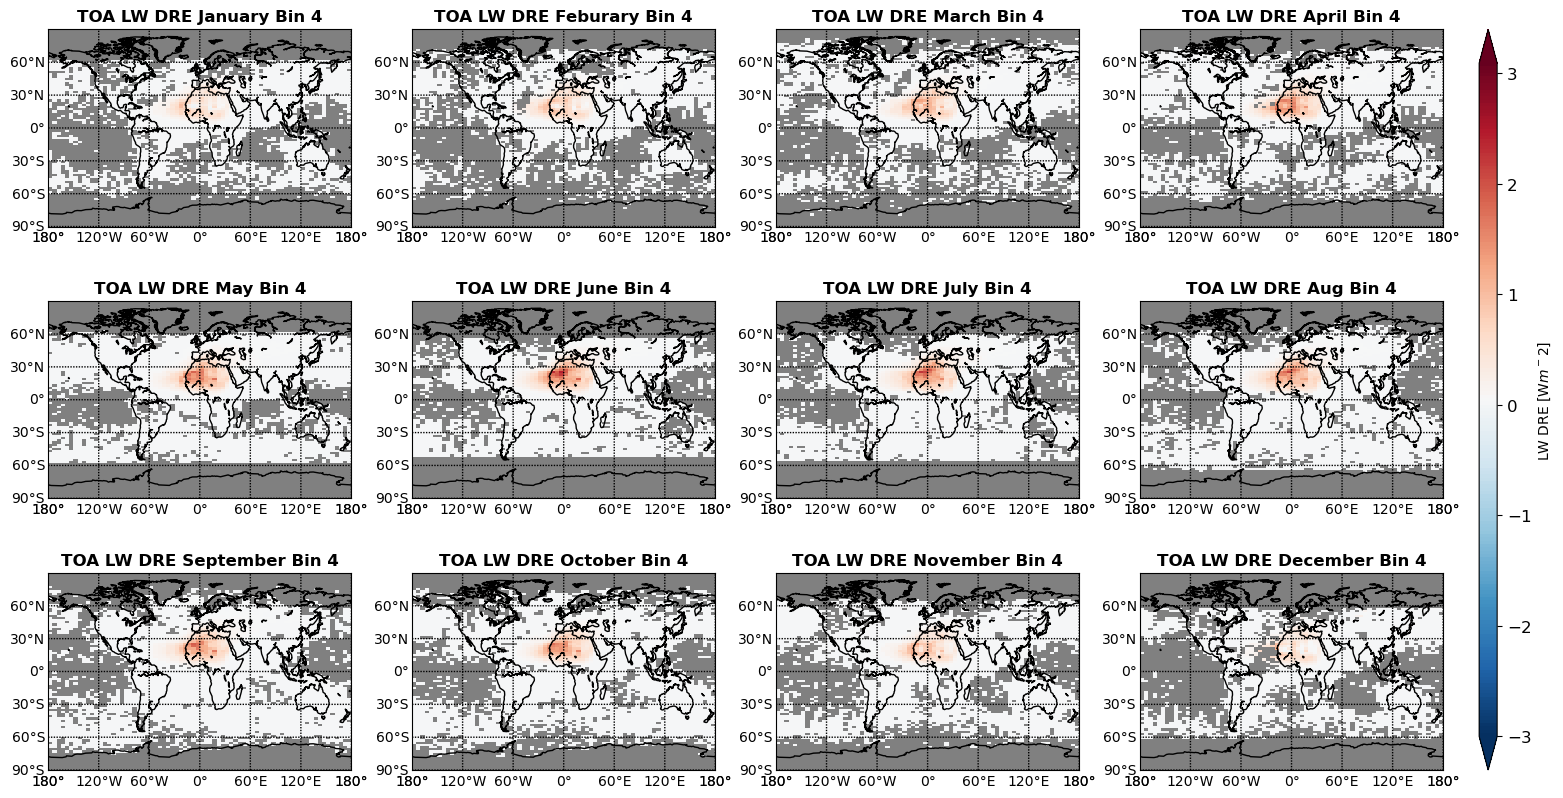

In [162]:
#bin 4 is bin[3]
binn = 3
#define lon lat boundaries for map plot
lon_bds = np.arange(-180,181,5)  # longitude grid boundaries (CALIOP DATA)
lat_bds = np.arange(-90,91,2)   # latitude grid boundaries (CALIOP DATA)


bounds_swdre = np.arange(-3,3.1,0.03)
norm_swdre  = colors.BoundaryNorm(boundaries = bounds_swdre, ncolors = 256)
#----------
#Global Map of Monthly Mean DRE_SW of North African Dust
#----------

fig,ax = plt.subplots(3,4,figsize=(18,10))
fig.patch.set_facecolor('white')
map = Basemap(llcrnrlon = -180, llcrnrlat = -90, urcrnrlon = 180, urcrnrlat = 90)

Lon,Lat = map(lon_bds,lat_bds)   
aspect=1.3
mns=np.array(['January','Feburary','March','April','May','June','July','Aug','September','October','November','December'])

#Plot DRE bin averaged by month 
months = np.arange(0,12,1)
fig_arrangement = [ax[0,0] ,ax[0,1], ax[0,2], ax[0,3], ax[1,0], ax[1,1], ax[1,2], ax[1,3], ax[2,0], ax[2,1], ax[2,2],ax[2,3]]

months = np.arange(0,12,1)
for i in months:
    imn = months[i]
    axis= fig_arrangement[i]
    map.drawcoastlines(ax=axis)
    map.drawparallels(np.arange(-90.,90.,30.),labels=[True,False,False,False],ax=axis,fontsize=10)
    map.drawmeridians(np.arange(-180.,180.,60.),labels=[False,False,False,True],ax=axis,fontsize=10)
    cs00=map.pcolormesh(Lon,Lat,nn_dresw_toa_bin_weighted[binn,imn,:,:],cmap=plt.get_cmap('RdBu_r'),norm=norm_swdre,ax=axis)
    axis.set_title('TOA {:} DRE {:s} Bin {:}'.format(dree_radition[dree_rad],mns[imn],binn+1),fontsize=12,fontweight='bold')
    axis.set_aspect(aspect)

cmap = plt.cm.get_cmap("RdBu_r").copy()
cmap.set_bad(color='grey')

#****Colorbar
# getting the lower left (x0,y0) and upper right (x1,y1) corners:
[[x00,y00],[x01,y01]] = ax[0,3].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[2,3].get_position().get_points()
pad = 0.02; width = 0.01
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
axcb = fig.colorbar(cs00, cax=cbar_ax,extend='both',ticks=np.array([-3,-2,-1,0,1,2,3]))
axcb.ax.tick_params(labelsize=12)
axcb.set_label('{:} DRE [W$m^-2$]'.format(dree_radition[dree_rad]))


# 10. Calculate annual avg North African dust SW DRE TOA

In [163]:
NAf_SWDRE_annual_avg = np.zeros((90,72))
for ilat in range(90):
    for ilon in range(72):
        NAf_SWDRE_annual_avg[ilat,ilon] = np.nansum(bin_sum_nn_dresw_toa_bin_weighted[:,ilat,ilon])/(12)
print(np.array(NAf_SWDRE_annual_avg).shape)
print(np.array(NAf_SWDRE_annual_avg[0]).shape)
NAf_SWDRE_annual_avg = np.array(NAf_SWDRE_annual_avg)
print(NAf_SWDRE_annual_avg)

(90, 72)
(72,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


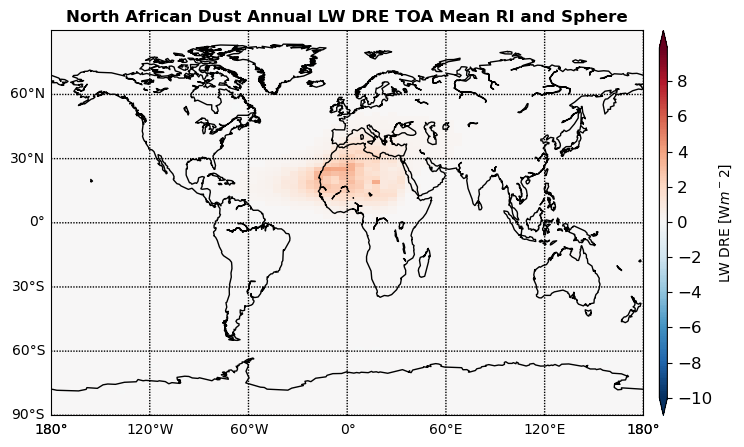

In [165]:

#define lon lat boundaries for map plot
lon_bds = np.arange(-180,181,5)  # longitude grid boundaries (CALIOP DATA)
lat_bds = np.arange(-90,91,2)   # latitude grid boundaries (CALIOP DATA)


bounds_swdre = np.arange(-10,10,0.1)
norm_swdre  = colors.BoundaryNorm(boundaries = bounds_swdre, ncolors = 256)
#----------
#Global Map of Monthly Mean DRE_SW of North African Dust
#----------

map = Basemap(llcrnrlon = -180, llcrnrlat = -90, urcrnrlon = 180, urcrnrlat = 90)

Lon,Lat = map(lon_bds,lat_bds)   
aspect=1.3

#Plot DRE annual average 

fig,ax = plt.subplots(1,1,figsize=(8,5))
fig.patch.set_facecolor('white')
map = Basemap(llcrnrlon = -180, llcrnrlat = -90, urcrnrlon = 180, urcrnrlat = 90)

Lon,Lat = map(lon_bds,lat_bds)   
aspect=1.3

#Plot DRE bin averaged by month 
fig_arrangement = ax #[0,0]

dree_range = ['Min RI', 'Mean RI', 'Max RI']

axis= fig_arrangement
map.drawcoastlines(ax=axis)
map.drawparallels(np.arange(-90.,90.,30.),labels=[True,False,False,False],ax=axis,fontsize=10)
map.drawmeridians(np.arange(-180.,180.,60.),labels=[False,False,False,True],ax=axis,fontsize=10)
cs00=map.pcolormesh(Lon,Lat,NAf_SWDRE_annual_avg,cmap=plt.get_cmap('RdBu_r'),norm=norm_swdre,ax=axis)
axis.set_title('North African Dust Annual {:} DRE TOA {:} and {:}'.format(dree_radition[dree_rad],dree_range[dree],dree_shape[dree_shp]),fontsize=12,fontweight='bold')
axis.set_aspect(aspect)

cmap = plt.cm.get_cmap("RdBu_r").copy()
cmap.set_bad(color='grey')

#****Colorbar
# getting the lower left (x0,y0) and upper right (x1,y1) corners:
[[x00,y00],[x01,y01]] = ax.get_position().get_points()
[[x10,y10],[x11,y11]] = ax.get_position().get_points()
pad = 0.02; width = 0.01
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
axcb = fig.colorbar(cs00, cax=cbar_ax,extend='both',ticks=np.array([-10,-8,-6,-4,-2,0,2,4,6,8,10]))
axcb.ax.tick_params(labelsize=12)
axcb.set_label('{:} DRE [W$m^-2$]'.format(dree_radition[dree_rad]))


# 11. Calculate global avg North African dust SW DRE TOA

In [166]:
from funct_call import deg2rad
llon,llat = np.meshgrid(lon,lat)

SW_DRE_Naf_dust_global_avg = np.average(NAf_SWDRE_annual_avg, weights = np.cos(deg2rad(llat)))
print(SW_DRE_Naf_dust_global_avg )

#SW-sphere-MinRI = -0.23778641074148818
#SW-sphere-MaxRI = -0.07582501960024407
#SW-sphere-MeanRI = -0.15739836993805037

#LW sphere MeanRi  = 0.08758332323019342

0.08758332323019342


# 16. Calculate DRE SW Monthly average (across all bins)

In [167]:
 bin_sum_nn_dresw_toa_bin_weighted.shape

(12, 90, 72)

In [97]:
def deg2rad(deg):
    rad = deg*np.pi/180
    return(rad)

In [98]:
#AREA WEIGHTED AVERAGE
#----------
#For each month: calculate globally-averaged dust DRE weighted by surface area of each grid cell
#----------
#print(lon)#72
#print(lat)#90

llon,llat = np.meshgrid(lon,lat)
#print(np.shape(llat))

#12 months
dresw_toa_are_and_bin_weighted_NorthAf = np.zeros(12)
test_avg = np.zeros(12)

bin_sum_nn_dresw_toa_bin_weighted

#North African dust DRE SW @ TOA Averaged over every bin and month
for imn in range(0,12):
    x = np.ma.MaskedArray(bin_sum_nn_dresw_toa_bin_weighted[imn,:,:],mask=np.isnan(bin_sum_nn_dresw_toa_bin_weighted[imn,:,:]))
    dresw_toa_are_and_bin_weighted_NorthAf[imn] = np.average(x, weights=(np.cos(deg2rad(llat))))
print(len(dresw_toa_are_and_bin_weighted_NorthAf)) 
print("Monthly DRE North African Dust Avg =",dresw_toa_are_and_bin_weighted_NorthAf)        


12
Monthly DRE North African Dust Avg = [-0.18800356 -0.16483304 -0.14684591 -0.14107125 -0.13928003 -0.13205105
 -0.1343088  -0.13752136 -0.14653938 -0.16716478 -0.19174594 -0.19941533]


Most cooling in DJF and least cooling in summer, is that what we expect?

# 17. Seasonal Sw DRE

In [99]:
sw_DRE_DJF = np.mean(dresw_toa_are_and_bin_weighted_NorthAf[:2])
print('sw_DRE_DJF',sw_DRE_DJF)
sw_DRE_MAM = np.mean(dresw_toa_are_and_bin_weighted_NorthAf[3:5])
print('sw_DRE_MAM',sw_DRE_MAM)
sw_DRE_JJA = np.mean(dresw_toa_are_and_bin_weighted_NorthAf[6:8])
print('sw_DRE_JJA',sw_DRE_JJA)
sw_DRE_SON = np.mean(dresw_toa_are_and_bin_weighted_NorthAf[9:11])
print('sw_DRE_SON',sw_DRE_SON)

sw_DRE_DJF -0.17641830275432324
sw_DRE_MAM -0.14017563882524658
sw_DRE_JJA -0.1359150821932285
sw_DRE_SON -0.1794553607721487


In [100]:
swDRE_seasonal = np.zeros((4,90,72))
for i in range(4):
    swDRE_seasonal[i,:,:] = np.sum(bin_sum_nn_dresw_toa_bin_weighted[i+(i*2):i+(i*2)+2,:,:])/3

print(len(swDRE_seasonal))

4


In [133]:
swDRE_seasonal = np.zeros((4,90,72))
swDRE_seasonal[0,:,:] = (1/3)*(bin_sum_nn_dresw_toa_bin_weighted[0,:,:] + bin_sum_nn_dresw_toa_bin_weighted[1,:,:] + bin_sum_nn_dresw_toa_bin_weighted[2,:,:])
swDRE_seasonal[1,:,:] = (1/3)*(bin_sum_nn_dresw_toa_bin_weighted[3,:,:] + bin_sum_nn_dresw_toa_bin_weighted[4,:,:] + bin_sum_nn_dresw_toa_bin_weighted[5,:,:])
swDRE_seasonal[2,:,:] = (1/3)*(bin_sum_nn_dresw_toa_bin_weighted[6,:,:] + bin_sum_nn_dresw_toa_bin_weighted[7,:,:] + bin_sum_nn_dresw_toa_bin_weighted[8,:,:])
swDRE_seasonal[3,:,:] = (1/3)*(bin_sum_nn_dresw_toa_bin_weighted[9,:,:] + bin_sum_nn_dresw_toa_bin_weighted[10,:,:] + bin_sum_nn_dresw_toa_bin_weighted[11,:,:])
print(swDRE_seasonal.shape)
print(swDRE_seasonal)

(4, 90, 72)
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]


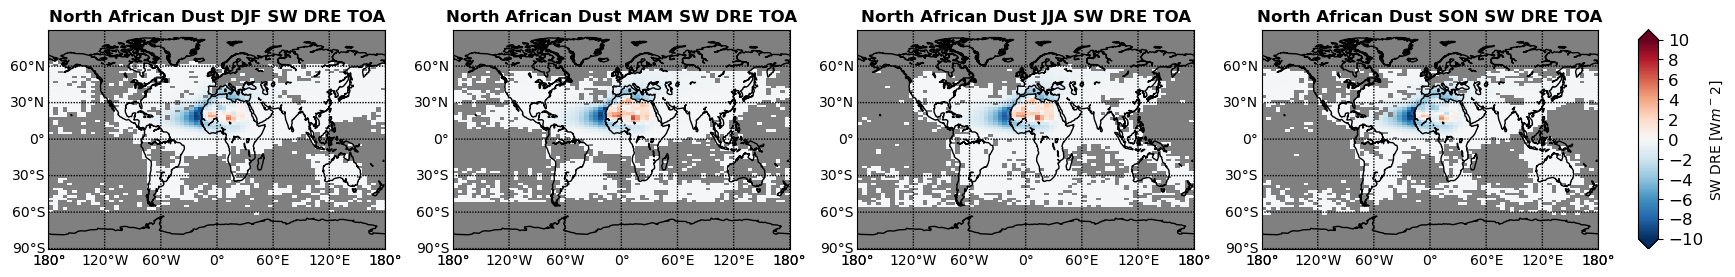

In [141]:
#define lon lat boundaries for map plot
lon_bds = np.arange(-180,181,5)  # longitude grid boundaries (CALIOP DATA)
lat_bds = np.arange(-90,91,2)   # latitude grid boundaries (CALIOP DATA)


bounds_swdre = np.arange(-10,10.01,.1)
norm_swdre  = colors.BoundaryNorm(boundaries = bounds_swdre, ncolors = 256)
#----------
#Global Map of Monthly Mean DRE_SW of North African Dust
#----------

#Plot DRE annual average 

fig,ax = plt.subplots(1,4,figsize=(20,5))
fig.patch.set_facecolor('white')
map = Basemap(llcrnrlon = -180, llcrnrlat = -90, urcrnrlon = 180, urcrnrlat = 90)

Lon,Lat = map(lon_bds,lat_bds)   
aspect=1.3

#Plot DRE bin averaged by month 
fig_arrangement = [ax[0], ax[1], ax[2], ax[3]]
season = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(4):
    axis= fig_arrangement[i]
    map.drawcoastlines(ax=axis)
    map.drawparallels(np.arange(-90.,90.,30.),labels=[True,False,False,False],ax=axis,fontsize=10)
    map.drawmeridians(np.arange(-180.,180.,60.),labels=[False,False,False,True],ax=axis,fontsize=10)
    cs00=map.pcolormesh(Lon,Lat,swDRE_seasonal[i],cmap=plt.get_cmap('RdBu_r'),norm=norm_swdre,ax=axis)
    axis.set_title('North African Dust {:s} {:} DRE TOA'.format(season[i],dree_radition[dree_rad]),fontsize=12,fontweight='bold')
    axis.set_aspect(aspect)

cmap = plt.cm.get_cmap("RdBu_r").copy()
cmap.set_bad(color='grey')

#****Colorbar.
# getting the lower left (x0,y0) and upper right (x1,y1) corners:
[[x00,y00],[x01,y01]] = ax[0].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[3].get_position().get_points()
pad = 0.02; width = 0.01
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
axcb = fig.colorbar(cs00, cax=cbar_ax,extend='both',ticks=np.array([-10,-8,-6,-4,-2,0,2,4,6,8,10]))
axcb.ax.tick_params(labelsize=12)
axcb.set_label('{:} DRE [W$m^-2$]'.format(dree_radition[dree_rad]))

# Extra Bin Statistics

## MIN AND MAX Range of Global DRE SW bin sum  - Mean RI

 - Not Area weighted but bin weighted

In [33]:
#FIND MIN AND MAX Range of DRE SW by month (summed over bins) 
#later,across first 6 bins -only up to 5 um so not including last 4 bin centers 
#so len(dreesw_meanri_sphere_bin_center)-5


#3/13/23 :includes * weights(lat) --> need to divide out or name new variable?
imn=0
maxval = 0
minval = 0
maxval_index = []
minval_index = []
for i in range(0,len(bin_sum_nn_dresw_toa_bin_weighted[imn,imn,:])): 
    for j in range(0, len(bin_sum_nn_dresw_toa_bin_weighted[imn,:,imn])):
            for m in range(0,12):
                if bin_sum_nn_dresw_toa_bin_weighted[m,j,i] > maxval:
                    maxval = bin_sum_nn_dresw_toa_bin_weighted[m,j,i]
                    maxval_index = [[m,j,i]]
                if bin_sum_nn_dresw_toa_bin_weighted[m,j,i] < minval:
                    minval = bin_sum_nn_dresw_toa_bin_weighted[m,j,i]
                    minval_index = [[m,j,i]]
                    
mns=np.array(['January','Feburary','March','April','May','June','July','Aug','September','October','November','December'])

print("Maximum SW DRE for North African dust = "+ str(maxval) + 'in month of '+ str(mns[3]))
print("Minimum SW DRE for North African dust = "+ str(minval) + 'in month of '+ str(mns[10]))
print(maxval_index) #month3, lat53, lon38
print(minval_index) #month10, lat54, lon32 


Maximum SW DRE for North African dust = 2.0169233633722405in month of April
Minimum SW DRE for North African dust = -12.28194252057765in month of November
[[3, 53, 38]]
[[10, 54, 32]]


# 10 a) MIN AND MAX Range of Global DRE SW by bin - Mean RI

In [34]:
nn_dresw_toa_bin_weighted.shape

(6, 12, 90, 72)

In [35]:
nn_dresw_toa_bin_weighted[:,0,0,0].shape

(6,)

In [36]:
#FIND MIN AND MAX Range of DRE SW -by bin and month
#later,across first 6 bins -only up to 5 um so not including last 4 bin centers 
#so len(dreesw_meanri_sphere_bin_center)-5

imn=0
binn = 0
maxval = 0
minval = 0
maxval_index = []
minval_index = []
for i in range(0,len(nn_dresw_toa_bin_weighted[binn,imn,imn,:])): 
    for j in range(0, len(nn_dresw_toa_bin_weighted[binn,imn,:,imn])):
        for k in range(0,len(nn_dresw_toa_bin_weighted[:,imn,imn,imn])):
            for m in range(0,12):
                if nn_dresw_toa_bin_weighted[k,m,j,i] > maxval:
                    maxval = nn_dresw_toa_bin_weighted[k,m,j,i]
                    maxval_index = [[k,m,j,i]]
                if nn_dresw_toa_bin_weighted[k,m,j,i] < minval:
                    minval = nn_dresw_toa_bin_weighted[k,m,j,i]
                    minval_index = [[k,m,j,i]]
                
print("Maximum SW DRE for North African dust by bin =", maxval)
print("Minimum SW DRE for North African dust by bin =", minval)
print(maxval_index) #bin5, month3, lat53, lon38
print(minval_index) #bin4, month6, lat61, lon32


Maximum SW DRE for North African dust by bin = 1.1024912422314244
Minimum SW DRE for North African dust by bin = -5.8509378310754325
[[5, 3, 53, 38]]
[[2, 10, 54, 32]]
